# Fake News Detector

### Alex Hedrick

### About the data (downloaded from Kaggle):

(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Published in:
IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).

0 = fake, 1 = real

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline
import nltk

# read data
news = pd.read_csv('news_data_2_recent/WELFake_Dataset.csv', sep=',', names = ['index','title','body','label'], header = None, skiprows = 1)
news = news.drop('index', axis=1)
news.head()

# read my personal data
my_news = pd.read_csv('news_data_2_recent\more_testing.csv', sep=',', names = ['index','body','lable','notes'], header = None, skiprows = 1, encoding='latin-1')
my_news.head()

,index,body,lable,notes
0,0,Mr. Bidens re-election bid and his renewed pl...,0,facts/nyt
1,1,"TASHKENT, April 30 (Reuters) - Uzbekistan vote...",0,facts/reuters
2,2,A Texas man went next door with a rifle and fa...,0,facts/ap
3,3,\nPresident Franklin Roosevelt launched a war ...,1,opinion/cnn
4,4,Your beer hates you. So does your phone. And y...,1,opinion/fox


### Data Preprocessing

In [2]:
import string
from warnings import simplefilter
import time
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
start_time = time.time()

# some other suggestions by chatgpt
# remove html tags
# remove urls and email addresses

# remove all rows with missing values
news = news.dropna()
print('removed missing values in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# # only keep first however many rows of news
# news = news[:15000]

# define set of allowed characters
allowed_chars = set(string.ascii_letters + string.digits + ' ')

# remove non-alphanumeric characters from news
# news['title'] = news['title'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
news['body'] = news['body'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
my_news['body'] = my_news['body'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
print('removed non-alphanumeric characters in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# convert all news to lowercase
# news['title'] = news['title'].str.lower()
news['body'] = news['body'].str.lower()
my_news['body'] = my_news['body'].str.lower()
print('converted to lowercase in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# replace 0 with -1 for label
# now, -1 = fake news, 1 = real news
# news['label'] = news['label'].replace(0, -1)

news.head()


removed missing values in 0.05 seconds
removed non-alphanumeric characters in 14.36 seconds
converted to lowercase in 14.57 seconds


,title,body,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,now most of the demonstrators gathered last n...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,the rs28 sarmat missile dubbed satan 2 will re...,1
5,About Time! Christian Group Sues Amazon and SP...,all we can say on this one is it s about time ...,1


### Generate Multinomial Features

Generate multinomial features based on the number of occurrences of the most common words in 'title' and 'body' using sklearn CountVectorizer

In [4]:
# generate multinomial features based on the number of occurrences of a set of words in the message using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 

# add some extra stop words
more_stop_words = ["s", "wa", "u", "ha"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

# split data into training and validation sets
xtrain, xvali, training_labels, vali_labels = train_test_split(news['body'], news['label'], test_size=0.33, random_state=1)

# return the number of unique words in all training data
# def get_unique_words_count(training_data):
#     unique_words = set()
#     for message in training_data:
#         for word in message.split():
#             unique_words.add(word)
#     return len(unique_words)

# print(f'number of unique words: {get_unique_words_count(xtrain)}')

# look at only most frequent m words
# m = [50, 1000, 10000, 30000, 50000, 70000]
m = [50]

# initialize lists to hold training features and vali features
training_features = []
vali_features = []
my_news_features = []

# apply CountVectorizer to messages
for j in m:
    count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=j)
    # count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=m)
    # count_vectorizer = CountVectorizer(stop_words=stop_words)

    # get count features for training data
    training_features_temp = count_vectorizer.fit_transform(xtrain)
    # if j == 0:
    print(count_vectorizer.get_feature_names())

    # get count features for vali data
    vali_features_temp = count_vectorizer.transform(xvali)
    my_news_features_temp = count_vectorizer.transform(my_news['body'])

    # append training features to list
    training_features.append(training_features_temp)
    vali_features.append(vali_features_temp)
    my_news_features.append(my_news_features_temp)

    # print time elapsed
    print(f'finished m = {j}')

# now we have a list of count features and feature names for each value of m
for i in training_features:
    print(i.shape)

['according', 'american', 'campaign', 'clinton', 'country', 'did', 'donald', 'election', 'going', 'government', 'hillary', 'house', 'just', 'know', 'law', 'like', 'make', 'media', 'mr', 'national', 'new', 'news', 'obama', 'party', 'people', 'percent', 'police', 'political', 'president', 'presidential', 'public', 'republican', 'reuters', 'said', 'say', 'security', 'state', 'states', 'think', 'time', 'told', 'trump', 'trumps', 'united', 'washington', 'way', 'white', 'world', 'year', 'years']
finished m = 50
(47929, 50)


#### Homemade Naive Bayes

In [106]:
# multinomial naive bayes classifier
import numpy as np

class NaiveBayes:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.word_count = None
        self.class_prior = None
        self.word_prob = None
    
    def fit(self, xtrain, ytrain):
        # calculate number of words in current dictionary
        self.word_count = xtrain.shape[1]
        
        # calculate class prior probabilities (aka what percent of each label we have), P(y)
        _, class_counts = np.unique(ytrain, return_counts=True)
        self.class_prior = class_counts / np.sum(class_counts)

        # calculate word counts for both classes
        word_counts = np.zeros((2, self.word_count)) # 2 classes (fake and real)
        for i in range(xtrain.shape[0]):
            word_counts[ytrain[i]] += xtrain[i]
        
        # add alpha to the word counts to avoid zero probabilities
        word_counts += self.alpha
        
        # calculate the probability of each word showing up in each class, P(x|y)
        total_counts = np.sum(word_counts, axis=1).reshape(-1, 1)
        self.word_prob = word_counts / total_counts
    
    def predict(self, xtest):
        # calculate the log probabilities for both classes, log(P(y)) + log(P(x|y))
        log_probs = np.log(self.class_prior) + xtest.dot(np.log(self.word_prob).T)

        # simply pick the class with the highest log probability
        classes = np.argmax(log_probs, axis=1)

        return classes
    
        


model trained in 0.11 seconds
predictions made in 0.12 seconds
m = 50
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11515
           1       0.85      0.84      0.85     12093

    accuracy                           0.84     23608
   macro avg       0.84      0.84      0.84     23608
weighted avg       0.84      0.84      0.84     23608



C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


model trained in 0.29 seconds
predictions made in 0.39 seconds
m = 1000
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11515
           1       0.88      0.88      0.88     12093

    accuracy                           0.88     23608
   macro avg       0.88      0.88      0.88     23608
weighted avg       0.88      0.88      0.88     23608



C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


model trained in 2.86 seconds


C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


predictions made in 4.46 seconds
m = 10000
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     11515
           1       0.89      0.89      0.89     12093

    accuracy                           0.89     23608
   macro avg       0.89      0.89      0.89     23608
weighted avg       0.89      0.89      0.89     23608

model trained in 58.2 seconds


C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


predictions made in 67.45 seconds
m = 30000
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     11515
           1       0.91      0.90      0.91     12093

    accuracy                           0.90     23608
   macro avg       0.90      0.90      0.90     23608
weighted avg       0.90      0.90      0.90     23608

model trained in 77.86 seconds


C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


predictions made in 113.22 seconds
m = 50000
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     11515
           1       0.92      0.91      0.91     12093

    accuracy                           0.91     23608
   macro avg       0.91      0.91      0.91     23608
weighted avg       0.91      0.91      0.91     23608

model trained in 94.15 seconds


C:\Users\alexh\AppData\Local\Temp\ipykernel_12696\2431385318.py:41: RuntimeWarning: invalid value encountered in true_divide
  confidences = np.divide(np.max(probs, axis=1), np.sum(probs, axis=1))


predictions made in 167.17 seconds
m = 70000
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     11515
           1       0.92      0.91      0.92     12093

    accuracy                           0.91     23608
   macro avg       0.91      0.91      0.91     23608
weighted avg       0.91      0.91      0.91     23608



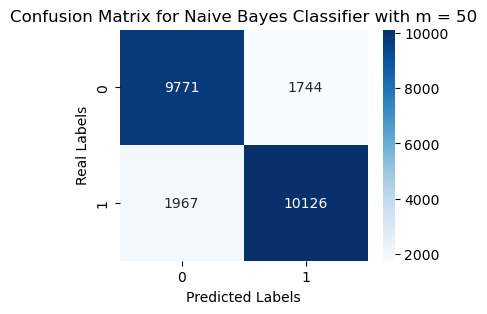

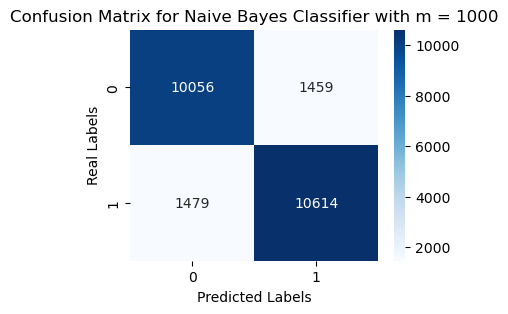

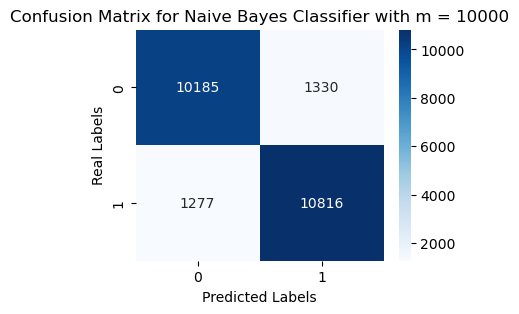

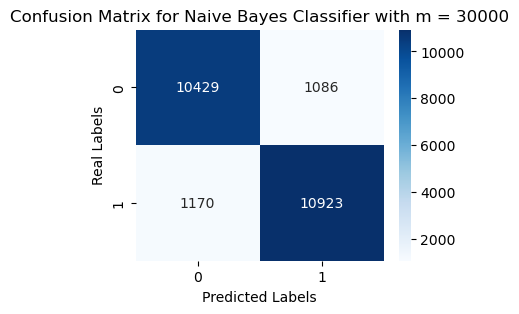

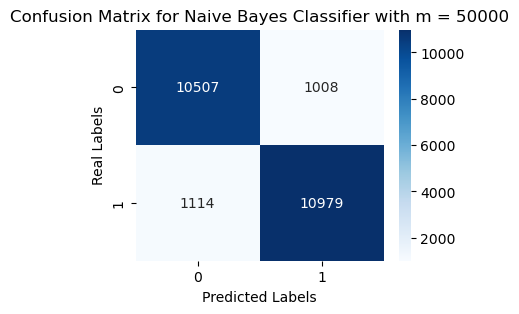

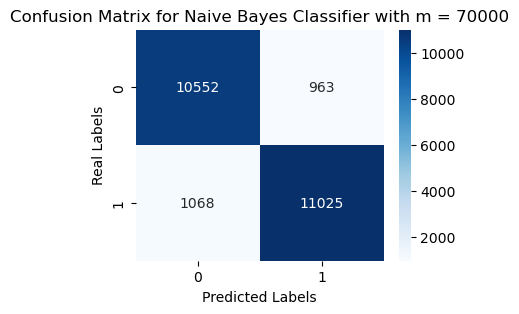

In [92]:
# from sklearn.metrics import accuracy_score

for i in range(len(m)):
    time_start = time.time()
    # train naive bayes model
    nb = NaiveBayes()
    nb.fit(training_features[i].toarray(), training_labels.ravel())
    print('model trained in ' + str(np.round(time.time() - time_start,2)) + ' seconds')

    # Make predictions on test data
    ybayes = nb.predict(vali_features[i].toarray())
    print('predictions made in ' + str(np.round(time.time() - time_start,2)) + ' seconds')

    # Print results
    print(f'm = {m[i]}')
    print(classification_report(vali_labels, ybayes))
    # print("Confidences:", confidences)

    # acc = accuracy_score(vali_labels, ybayes)
    # print('Accuracy:', acc)

    # print confusion matrix
    plt.figure(figsize = (4,3))

    sns.heatmap(confusion_matrix(vali_labels,ybayes), annot=True, 
                fmt='', cmap='Blues')

    plt.title('Confusion Matrix for Naive Bayes Classifier with m = ' + str(m[i]))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')


model trained in 24.7 seconds
predictions made in 24.75 seconds
m = 30000
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: lable, dtype: int64
[0 0 0 0 1 0 1 1 1 1]


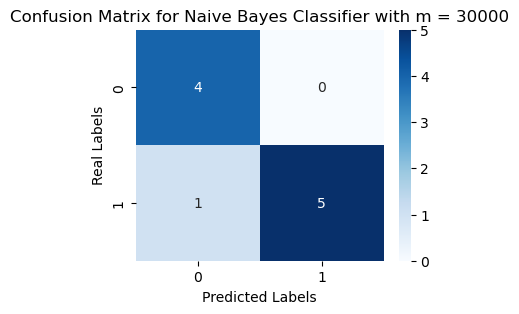

In [107]:
# predicting some articles I found off the internet
# for i in range(len(m)):
for i in range(3,4):
# for i in range(1):
    time_start = time.time()
    # train naive bayes model
    nb = NaiveBayes()
    nb.fit(training_features[i].toarray(), training_labels.ravel())
    print('model trained in ' + str(np.round(time.time() - time_start,2)) + ' seconds')

    # Make predictions on test data
    ybayes = nb.predict(my_news_features[i].toarray())
    print('predictions made in ' + str(np.round(time.time() - time_start,2)) + ' seconds')

    # Print results
    print(f'm = {m[i]}')
    print(classification_report(my_news['lable'], ybayes))
    print(my_news['lable'])
    print(ybayes)

    # acc = accuracy_score(vali_labels, ybayes)
    # print('Accuracy:', acc)

    # print confusion matrix
    plt.figure(figsize = (4,3))

    sns.heatmap(confusion_matrix(my_news['lable'],ybayes), annot=True, 
                fmt='', cmap='Blues')

    plt.title('Confusion Matrix for Naive Bayes Classifier with m = ' + str(m[i]))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')


the only article from the 10 I chose that the predictor mis-classified (according to my labels) was an opinion article from cnn which I believe could have been classified as fake or real, depending on how you want to classify opinion articles. huge win!